In [48]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
!pip install catboost

In [50]:
# Load the dataset.
# The dataset can be downloaded here: https://www.kaggle.com/wanghaohan/confused-eeg.
df = pd.read_csv("EEG_data.csv")
subs = pd.read_csv("demographic_info.csv")

In [51]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [52]:
df.tail()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0
12810,9.0,9.0,64.0,29.0,-49.0,1164555.0,1184366.0,50014.0,124208.0,10634.0,445383.0,22133.0,4482.0,1.0,0.0


In [53]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


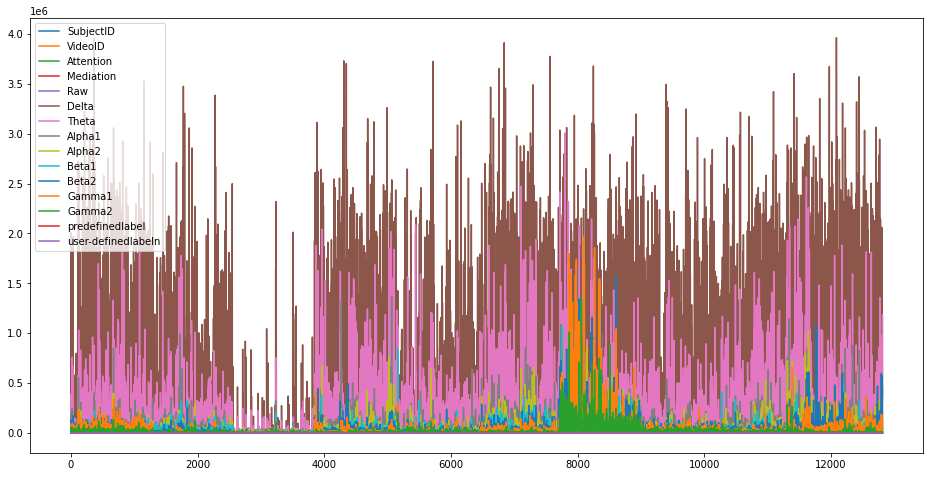

In [55]:
# Visualize the data.
df.plot(figsize=(16,8))

In [56]:
# Check correlation.
corr = df.corr()
corr

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
SubjectID,1.000000,-0.005433,-0.180441,-0.170742,0.027211,0.202922,0.120596,0.116931,0.154046,0.098837,0.150109,0.100404,0.100470,-0.002780,0.016966
VideoID,-0.005433,1.000000,-0.043221,0.007286,0.007152,0.009813,-0.000652,0.013590,-0.010091,0.007593,-0.074124,-0.057620,-0.025371,0.871342,0.007233
Attention,-0.180441,-0.043221,1.000000,0.548606,-0.094933,-0.220403,-0.258356,-0.198662,-0.247011,-0.255361,-0.306624,-0.299903,-0.312734,0.001559,-0.119088
Mediation,-0.170742,0.007286,0.548606,1.000000,-0.106923,-0.111810,-0.179887,-0.043275,-0.153740,-0.240774,-0.391365,-0.344922,-0.373253,0.015751,-0.023502
Raw,0.027211,0.007152,-0.094933,-0.106923,1.000000,0.048908,0.053443,0.045247,0.063867,0.090863,0.173631,0.186884,0.205772,0.010598,-0.001465
Delta,0.202922,0.009813,-0.220403,-0.111810,0.048908,1.000000,0.483386,0.426530,0.409898,0.395217,0.260820,0.210062,0.218673,0.012333,0.148588
Theta,0.120596,-0.000652,-0.258356,-0.179887,0.053443,0.483386,1.000000,0.586956,0.553796,0.555541,0.368975,0.300468,0.308575,0.001602,0.147558
Alpha1,0.116931,0.013590,-0.198662,-0.043275,0.045247,0.426530,0.586956,1.000000,0.565232,0.549113,0.317923,0.267677,0.323593,0.011802,0.121711
Alpha2,0.154046,-0.010091,-0.247011,-0.153740,0.063867,0.409898,0.553796,0.565232,1.000000,0.626824,0.464840,0.374979,0.455567,-0.001838,0.107238
Beta1,0.098837,0.007593,-0.255361,-0.240774,0.090863,0.395217,0.555541,0.549113,0.626824,1.000000,0.480490,0.422165,0.527484,0.008543,0.111482


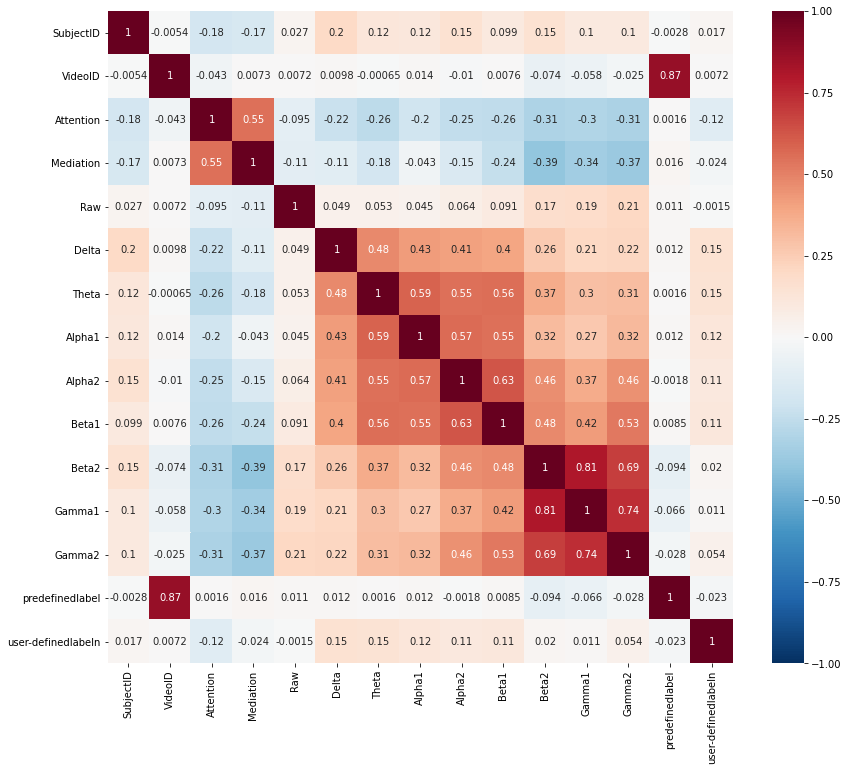

In [57]:
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
plt.show()

In [58]:
subs

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [59]:
# Count up the class.
df['user-definedlabeln'].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: No Confused | 1: Confused)')

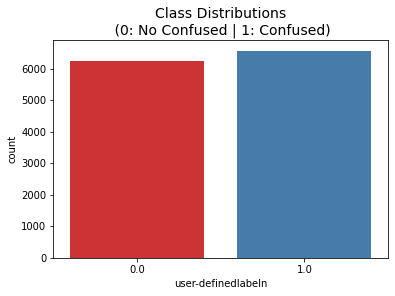

In [60]:
import seaborn as sns

# Display the class distritution.
sns.countplot(x='user-definedlabeln', data=df, palette="Set1")
plt.title('Class Distributions\n (0: No Confused | 1: Confused)', fontsize=14)

In [61]:
# Separate input features and target.
X = df.drop(['predefinedlabel', 'user-definedlabeln'], axis=1).values
y = df['user-definedlabeln'].values
print(X.shape, y.shape)

(12811, 13) (12811,)


In [62]:
from sklearn.model_selection import train_test_split
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10248, 13) (2563, 13) (10248,) (2563,)


#Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
for i in range(1,10):
    rf_clf = RandomForestClassifier(n_estimators=i, max_depth=3, random_state=7)
    rf_clf.fit(X_train, y_train)
    rf_clf.predict(X_test)
    # Print accuracy.
    accuracy = rf_clf.score(X_test, y_test)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.99%
Accuracy: 59.07%
Accuracy: 59.11%
Accuracy: 59.50%
Accuracy: 62.58%
Accuracy: 62.58%
Accuracy: 63.36%
Accuracy: 64.03%
Accuracy: 64.18%


#Support Vector Machine

In [64]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
print(svm_clf.predict(X_test))
# Print accuracy.
accuracy = svm_clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0. 1. 0. ... 0. 0. 0.]
Accuracy: 58.84%


#Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
print(dt_clf.predict(X_test))
# Print accuracy.
accuracy = dt_clf.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[1. 1. 0. ... 0. 1. 1.]
Accuracy: 60.91%


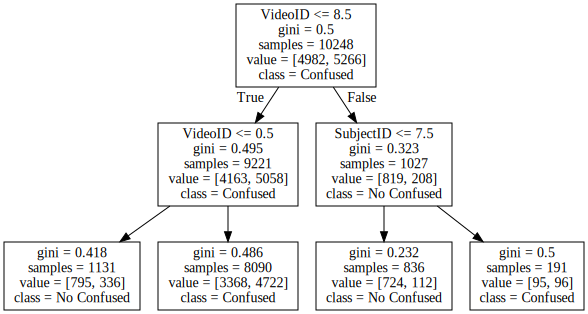

In [66]:
import graphviz 
from sklearn.tree import export_graphviz
features = ['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
tree_view = export_graphviz(dt_clf, 
                            out_file=None, 
                            feature_names = features,
                            class_names = ['No Confused', 'Confused'])  
tree1viz = graphviz.Source(tree_view)
tree1viz

#XGBoost

In [67]:
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic', n_estimators=1000, seed=7)
xg.fit(X_train, y_train)
print(xg.predict(X_test))
# Print accuracy.
accuracy = xg.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[1. 0. 0. ... 0. 1. 0.]
Accuracy: 98.17%


#CatBoost

In [68]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=200, random_seed=7)
cb.fit(X_train, y_train)
print(cb.predict(X_test))
# Print accuracy.
accuracy = cb.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Learning rate set to 0.12174
0:	learn: 0.6325808	total: 11.5ms	remaining: 2.28s
1:	learn: 0.5935357	total: 21.5ms	remaining: 2.13s
2:	learn: 0.5696859	total: 31.2ms	remaining: 2.05s
3:	learn: 0.5393313	total: 41.1ms	remaining: 2.01s
4:	learn: 0.5189981	total: 50.9ms	remaining: 1.98s
5:	learn: 0.4930690	total: 63.3ms	remaining: 2.04s
6:	learn: 0.4777266	total: 73.9ms	remaining: 2.04s
7:	learn: 0.4662041	total: 84.3ms	remaining: 2.02s
8:	learn: 0.4580830	total: 94.6ms	remaining: 2.01s
9:	learn: 0.4309386	total: 105ms	remaining: 1.99s
10:	learn: 0.4269295	total: 115ms	remaining: 1.97s
11:	learn: 0.4083317	total: 125ms	remaining: 1.96s
12:	learn: 0.3813093	total: 135ms	remaining: 1.94s
13:	learn: 0.3531015	total: 145ms	remaining: 1.92s
14:	learn: 0.3403138	total: 154ms	remaining: 1.91s
15:	learn: 0.3292838	total: 164ms	remaining: 1.89s
16:	learn: 0.3127302	total: 174ms	remaining: 1.87s
17:	learn: 0.3012539	total: 184ms	remaining: 1.86s
18:	learn: 0.2870409	total: 193ms	remaining: 1.84s
19: